In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Interpol:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        assert(len(x) == len(y))
        
        # Считаю разделенные разности
        self.div_difs = np.zeros((len(y), len(y)))
        self.div_difs[:,0] = y

        for i in range(1,len(y)):
            for j in range(i,len(y)):
                self.div_difs[j][i] = (self.div_difs[j][i-1] - self.div_difs[j-1][i-1])\
                                        / (x[j] - x[j-i])
    
    # Рассчет значения интерполяционного многочлена в точке x_0
    def calc(self, x0):
        ans = []
        tmp = 1
        ans.append(tmp)
        for i in range(len(self.y)-1):
            '''
            (x-x_0)
            (x-x_0)*(x-x_1)
            ...
            (x-x_0)*...*(x-x_n)
            '''
            tmp *= x0 - self.x[i]
            ans.append(tmp)
            
        # f_0 + (x-x_0)*f_1 + (x-x_0)(x-x_1)*f_2 + ...
        return np.dot(np.array(ans), np.diag(self.div_difs))
    
    # Рассчет значения производной интерполяционного многочлена в точке x_0
    def deriv(self, x0):
        ans = []
        tmp = 1
        for i in range(len(self.y)-1):
            tmp *= x0 - self.x[i]
            tmp_for_sum = []
            for j in range(i+1):
                tmp_for_sum.append(tmp / (x0 - self.x[j]))
            ans.append(sum(tmp_for_sum))
        return np.dot(np.array(ans), np.diag(self.div_difs)[1:])
    
    # Построение графика
    def draw_plot(self):
        plt.figure()
        plt.scatter(self.x, self.y)
        x = np.linspace(min(self.x), max(self.x), 100)
        plt.plot(x, [self.calc(i) for i in x])
        plt.show()

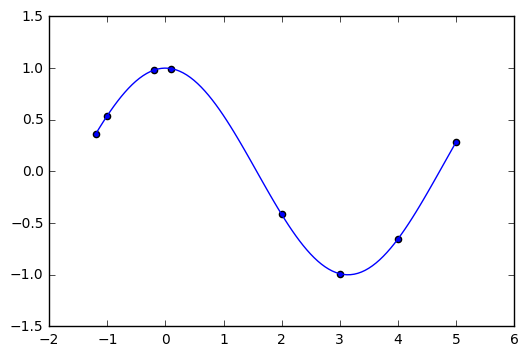

In [5]:
# x = np.array([1,2,3,4,5])
# y = np.array([1,4,9,16,25])
x = np.array([-1.2,-1,-0.2,0.1,2,3,4,5])
# y = np.array([-2.57215162,-1.55740772, -0.20271004,  0.10033467, -2.18503986, -0.14254654, 1.15782128, -3.38051501])
y = np.cos(x)
polynom = Interpol(x, y)
polynom.draw_plot()

Divided differences

In [6]:
p = 4.2
print("Значение полинома в точке:", polynom.calc(p))
print("Значение производной полинома в точке:", polynom.deriv(p))

Значение полинома в точке: -0.491055452125
Значение производной полинома в точке: 0.866477886768


In [7]:
-np.sin(p)

0.87157577241358808